<a href="https://colab.research.google.com/github/hanasgnt/PCVK_2024_14/blob/main/week9_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA  : Hana Sugianto**

**NIM   : 2241720102**

**kelas : TI 3E / 14**

Link github : https://github.com/hanasgnt/PCVK_2024_14/blob/main/week9_14.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##### **DILASI TANPA LIBRARY MORPHOLOGY**

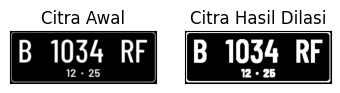

In [ ]:
#Dilasi tanpa library
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-
      constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

# Memuat dan memproses gambar biner
img_d= cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5

# Aplikasi fungsi dilasi
imgD = dilasi_citra(thresh, w)

# Menampilkan hasil
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

##### **DILASI DENGAN LIBRARY MORPHOLOGY**

[[1 1 1]
 [1 1 1]
 [1 1 1]]


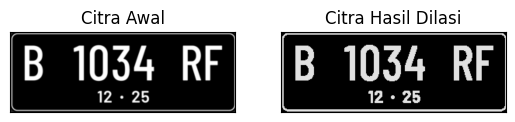

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png')
#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

##### **EROSI TANPA LIBRARY MORPHOLOGY**

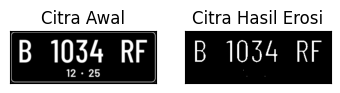

In [ ]:
# Erosi tanpa library

def erosi_citra(F, k):
    # Mendapatkan ukuran gambar
    m, n = F.shape
    # Membuat Struktur Elemen Erosi (SE)
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            # Ambil area seukuran elemen struktur
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            # Hitung erosi sebagai minimum dari hasil perkalian area dengan SE
            imgE[i, j] = np.min(temp * SE)

    return imgE

# Memuat dan memproses gambar biner
img_e = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k = 5

# Aplikasi fungsi erosi
imgE = erosi_citra(thresh1, k)

# Menampilkan hasil
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

##### **EROSI DENGAN LIBRARY MORPHOLOGY**

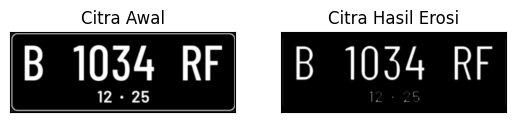

In [ ]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

##### **OPENING TANPA LIBRARY MORPHOLOGY**

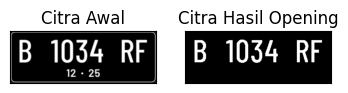

In [ ]:
img_o= cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho,k), k)

plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

##### **OPENING DENGAN LIBRARY MORPHOLOGY**

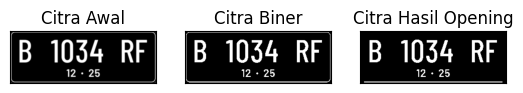

In [ ]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()

##### **CLOSING TANPA LIBRARY MORPHOLOGY**

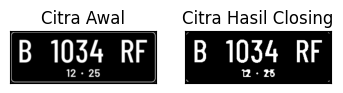

In [ ]:
img_c=  cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
retc, threshc = cv2.threshold(img_c, 127, 225,
cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

##### **CLOSING DENGAN LIBRARY MORPHOLOGY**

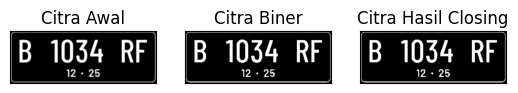

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])


plt.show()

##### **Dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5**

SED = Cross 3


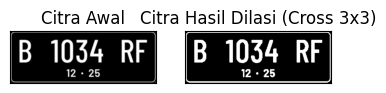

SED = Cross 5


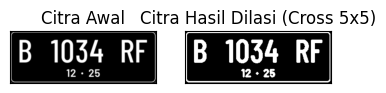

In [ ]:
# Fungsi dilasi dengan elemen struktur cross 3x3
def dilasi_citra(F, w):
    # Ukuran gambar
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Elemen Struktur Dilasi Cross 3x3
    SED = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            # Area lokal sesuai ukuran elemen struktur
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

print('SED = Cross 3')
img_d = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 3x3)'), plt.xticks([]), plt.yticks([])
plt.show()

# Fungsi dilasi dengan elemen struktur cross 5x5
def dilasi_citra(F, w):
    # Ukuran gambar
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Elemen Struktur Dilasi Cross 5x5
    SED = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)

    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            # Area lokal sesuai ukuran elemen struktur
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

print('SED = Cross 5')
img_d = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 5
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 5x5)'), plt.xticks([]), plt.yticks([])
plt.show()


##### **Dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5**

SED = Circle 3


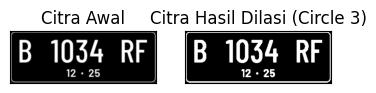

SED = Circle 5


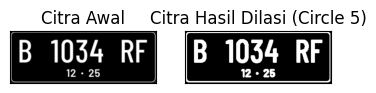

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Fungsi dilasi dengan elemen struktur circular (lingkaran)
def dilasi_citra(F, w):
    # Ukuran gambar
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Elemen Struktur Dilasi Circular
    SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w, w))
    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            # Area lokal sesuai ukuran elemen struktur
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

# Menggunakan elemen struktur circular dengan ukuran 3
print('SED = Circle 3')
img_d = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w)

# Menampilkan hasil
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi (Circle 3)'), plt.xticks([]), plt.yticks([])
plt.show()

# Menggunakan elemen struktur circular dengan ukuran 5
print('SED = Circle 5')
img_d = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 5
imgD = dilasi_citra(thresh, w)

# Menampilkan hasil
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi (Circle 5)'), plt.xticks([]), plt.yticks([])
plt.show()


##### **Erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7**

SE = Rectangle 3x5


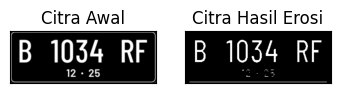

SE = Rectangle 5x7


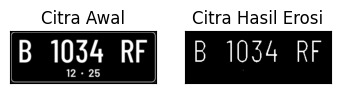

In [ ]:
# Erosi Cross SE
def erosi_citra(F,p,l):
  # size image
  m,n= F.shape
  # Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)
  # Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')

plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

##### **Erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5**

SE = Line Vertikal 3


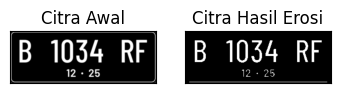

SE = Line Vertikal 5


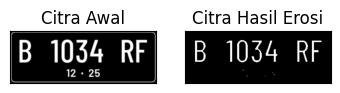

In [ ]:
# Erosi Line Vertikal SE
def erosi_citra(F,k):
  # size image
  m,n= F.shape
  #G enerate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal

  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  # Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-
      constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK_2024/image/biner-plat.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

##### **TopHat**

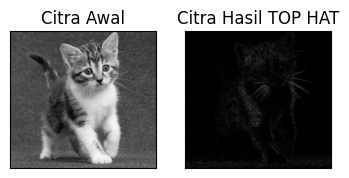

In [ ]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,
                                   filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img,
              cv2.MORPH_TOPHAT,
                kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

##### **BlackHat**

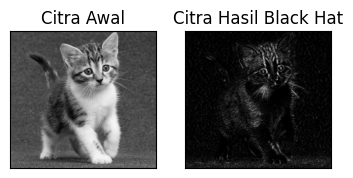

In [ ]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK_2024/image/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
# tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

# cv2.imshow("original", input_image)
# cv2.imshow("tophat", tophat_img)
# cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

##### **Skeleton**

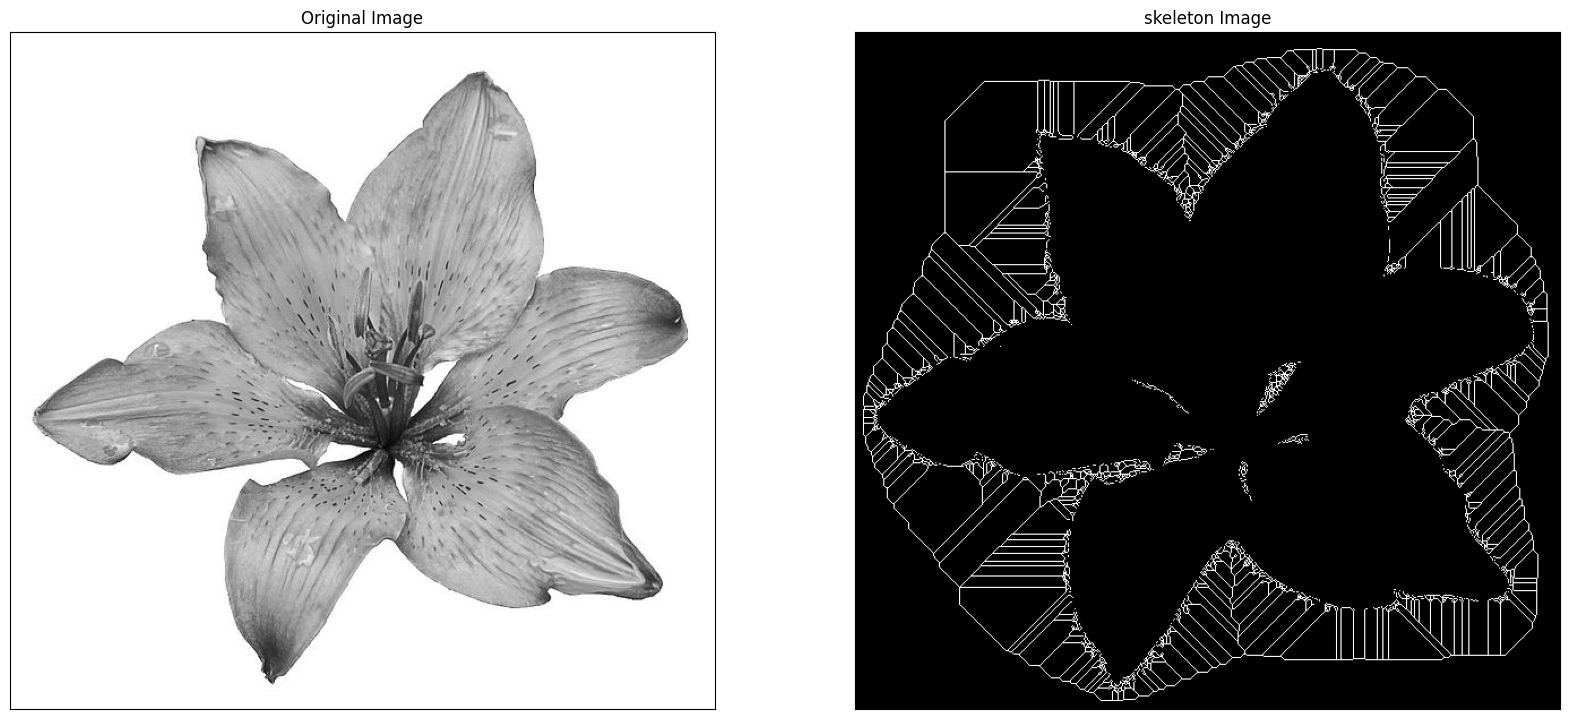

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/PCVK_2024/image/lily.jpg',0)
binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()

##### **Skeleton Inverse**

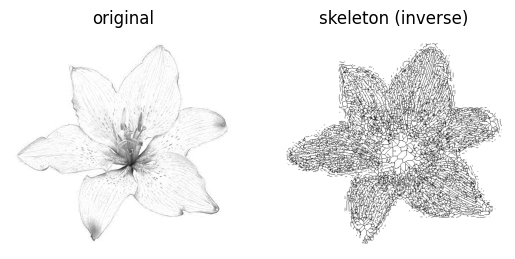

In [ ]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/PCVK_2024/image/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

##### **Thcikening**

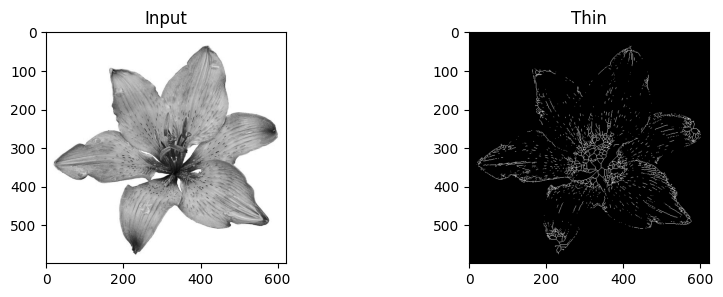

In [ ]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK_2024/image/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()